# Cervical cancer - predict if a biopsy is needed

In this notebook the steps will be shown on how to make a prediction if a biopsy is needed for the patient. This prediction is of use for woman who are in the puberty, adulthood and old age. The goal is that certain information will be put in like smoking habits, sexual activity, usage of IUD and that a result will be given on how highly a biopsy is adviced. Currently the dataset will give out a yes or no answer on if a biopsy is adviced. However, in the end it should be that the answer given should be a percentage to express how urgent a biopsy is required. Someone with a 17% chance needs to act not as quickly as someone who got a 88% chance.

This dataset will be used for this notebook [Cervical cancer dataset.](https://www.kaggle.com/datasets/loveall/cervical-cancer-risk-classification) The steps taken will follow the path of the [AI project methodology](https://fhict.instructure.com/courses/13770/pages/ai-project-methodology?module_item_id=1071124) given to us by school. Here is another link to the dataset that will provide info to the origin of the dataset, the other link does not provide that: [UCI link](https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors)

The data is collected at the university hospital of Caracas based in Venezuela. The data got collected in 2012-2013 and donated specifically on 03-02-2017 (based on the UCI website). It contains demograpgic information, habits and historic medical records of 858 patients. Some patients did not answer to every question because they were worried about their privacy which means that the dataset does include missing values.

The dataset is owned and donated by the following people: [Jaime Cardoso](https://scholar.google.com/citations?user=fadRi1YAAAAJ&hl=en), [Jessica Fernandes](https://ieeexplore.ieee.org/author/37086404421) and [Kelwin Fernandes](https://scholar.google.com/citations?user=FhbkV-wAAAAJ&hl=en)

The dataset will have 858 rows which represents the patients and 36 features. The features are a mix of binary values (0 and 1 will represent no and yes) and continuous values that can vary in a wide range.

At first we import libraries that we will need for sure. It is a general import of things that need in order to analyze, modify and use the data. If we need another library, we can still add it later on and use it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap as shp
import sklearn as sk

print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(shp.__version__)

C:\Users\Aynashuku\AppData\Local\Temp\ipykernel_19244\102335341.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


2.2.0
1.26.4
0.13.2
0.44.1


# Provisioning

The dataset must be placed in the same folder as the notebook file otherwise it won't load in. In case both files are seperated, please place them together or modify the code underneath so a path is created towards the dataset. Underneath you can find information about the dataset like the value it holds, what kind of datetype each feature is, some calculations made for us that we can use later on like mean and of course if there are null values. analyzing these things will help us decide if we need to modify the data and if we do, how we should modify it. Changing, adding and removing data is most of the time required to prusue the notebooks goal.

In [2]:
dataset = pd.read_csv('kag_risk_factors_cervical_cancer.csv')
dataset

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


So we can see down here that we got some integers as a type but also things called object. The notebook doesn't recognize the values in some features as a number which is something I'll need to chance since the dataset does only display numbers and I would need them later on for things like calculations and making a heatmap to check for null values. Nonetheless, the fact that we can see all the correct features names underneath and values in the list above shows that importing the dataset went fine and we can start working on it.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

# Preprocessing

In here we have to prepare the data for the model so it can be used to train and predict correctly. The first step is to deal with missing and unknown data. Every question mark will be replaced with NaN (not a number) to point out that this value is not a number. When that is done, pandas will be used to to replace every value to a numeric type. If it encounters something that can't be converted, that value will also be replaced by NaN. When this is done, all data types should be numerical. If we don't change this, the notebook will give out a error when I try to make tmap showing null values later on.

In [4]:
dataset = dataset.replace('?', np.nan)
dataset = dataset.apply(pd.to_numeric, errors='coerce')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

Now for the next step a heatmap will be made where it will be visible which features contains null values. With the use of a heatmap it will visualize the null values and it will help us to see quickly which features lacks information.

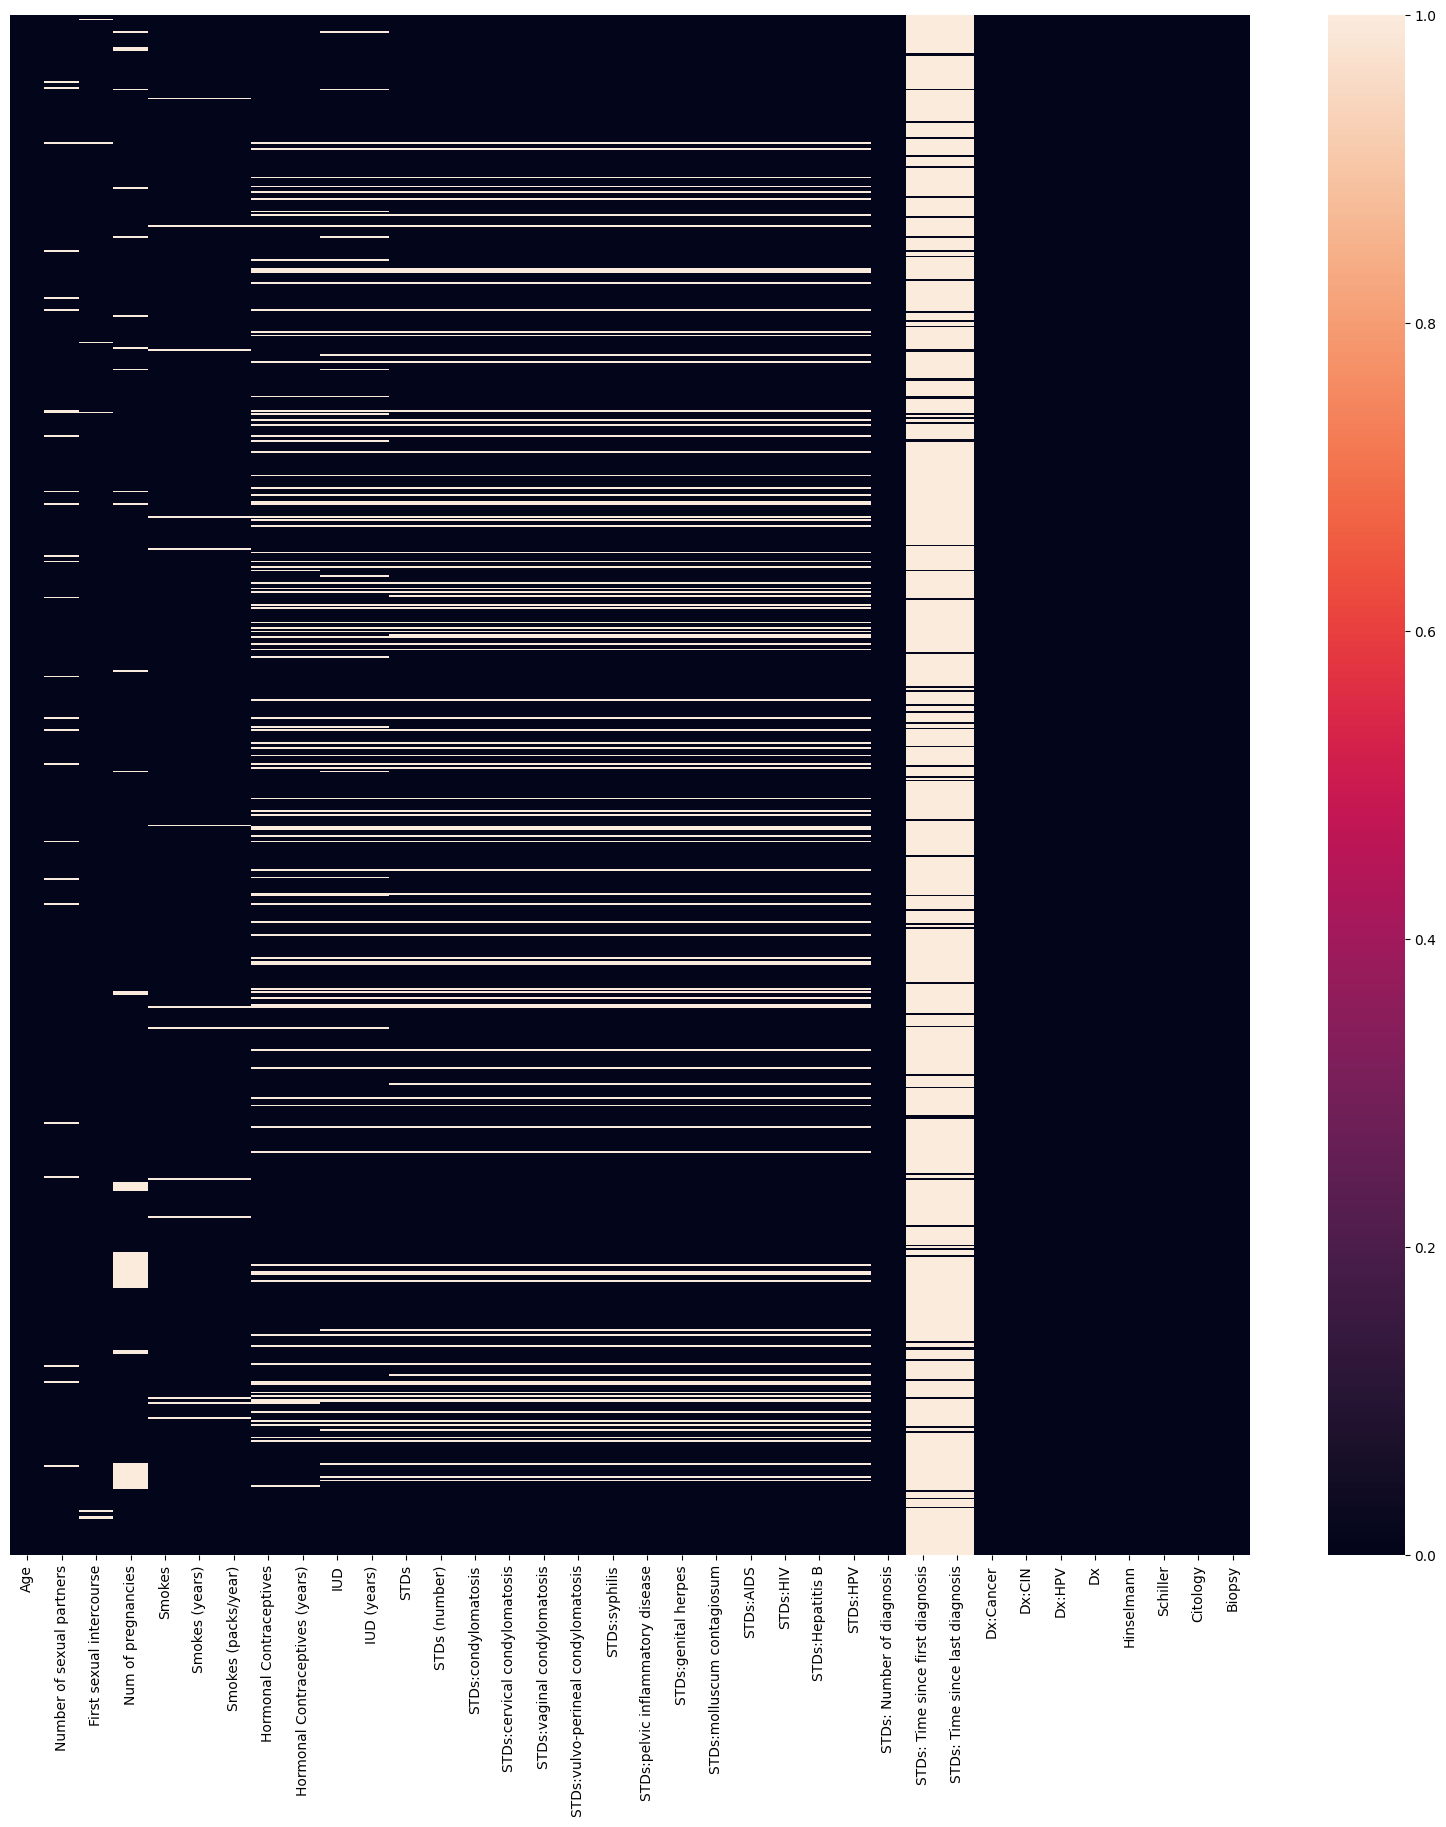

In [5]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.isnull(), yticklabels = False)
plt.show()

Since 2 features called "STDs: Time since first diagnosis" and "STDs: Time since last diagnosis" almost only exist out of missing values, they will be dropped out and not used from now on. There is just so little information to work with. The few bits of information that is present will most likely distract the model and just cause noise. t really does look like that when it comes to stds, that people didn't always want to answer. Desoute most std related information is useful, we can see that a good chunk is still missing.

In [6]:
dataset = dataset.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1)
dataset

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


Importing a library that we didn't had earlier.

In [7]:
from sklearn.impute import SimpleImputer

Now for the next step we will replace all the NaN values with the mean of that column. The imputer is applied to the dataset for this. A new dataset will come out of it which is called data_imputed. The original dataset that we started with still exists and can be used if needed. After this we check the summmary of the new dataset and we can see that we got no null values and that they all got the same data type. The reason why we are applying the strategy of mean in here is to preserve the structure of the dataset. This way we don't accidently make the dataset full of noise since the values that are replacing the missing spots will be similair to the existing values. After that we're printing out the info after all the changes we made to see if the features are still there that we want while making sure that there are no null values in the features that we want to proceed with.

In [8]:
imputer = sk.impute.SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(dataset), columns=dataset.columns)
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    float64
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

# Checking the correctness of the data
So now that all the features are numerical, it is now possible to use the describe function to see each features minimal and maximum value. The reason why we do this is to check if the ranges are realistic. The data dictionary is required to check on it. But by making sure if everything is correct now we will avoid any problems related to incorrect data later on. A good amount of features are answered in binary values which represent yes/no (0/1). The features that go with these values are:
- Smokes
- Hormonal Contraceptives
- IUD
- STDs
- STD: condylomatosis
- STD: cervical condylomatosis
- STD: vaginal condylomatosis
- STD: vulvo-perineal condylomatosis
- STD: syohillis
- STD: pelvic inflammatory disease
- STD: genital herpes
- STD: molluscum contagiousm
- STD: AIDS
- STD: HIV
- STD: Hepatitis B
- STD: HPV
- DX: Cancer
- DX: CIN
- DX: HPV
- DX
- Hinselmann
- Schiller
- Cytology
- Biopsy

Any other feature is a continious value.

In [10]:
print(data_imputed.describe())

              Age  Number of sexual partners  First sexual intercourse  \
count  858.000000                 858.000000                858.000000   
mean    26.820513                   2.527644                 16.995300   
std      8.497948                   1.642267                  2.791883   
min     13.000000                   1.000000                 10.000000   
25%     20.000000                   2.000000                 15.000000   
50%     25.000000                   2.000000                 17.000000   
75%     32.000000                   3.000000                 18.000000   
max     84.000000                  28.000000                 32.000000   

       Num of pregnancies      Smokes  Smokes (years)  Smokes (packs/year)  \
count          858.000000  858.000000      858.000000           858.000000   
mean             2.275561    0.145562        1.219721             0.453144   
std              1.399325    0.350189        4.057885             2.209657   
min              0.00

Over here we are checking if the smoke usage in years is less than age. Someone who is 30 couldn't smoke for 40 years. So we're making sure that there are no weird values like that in the dataset. Otherwise the model can't be trusted from the start. Underneath we can confirm that the age is always higher than the usage in years. It is also noticed how some people started out incredibly young smoking which is something to keep a eye on during the evluation with the models result.

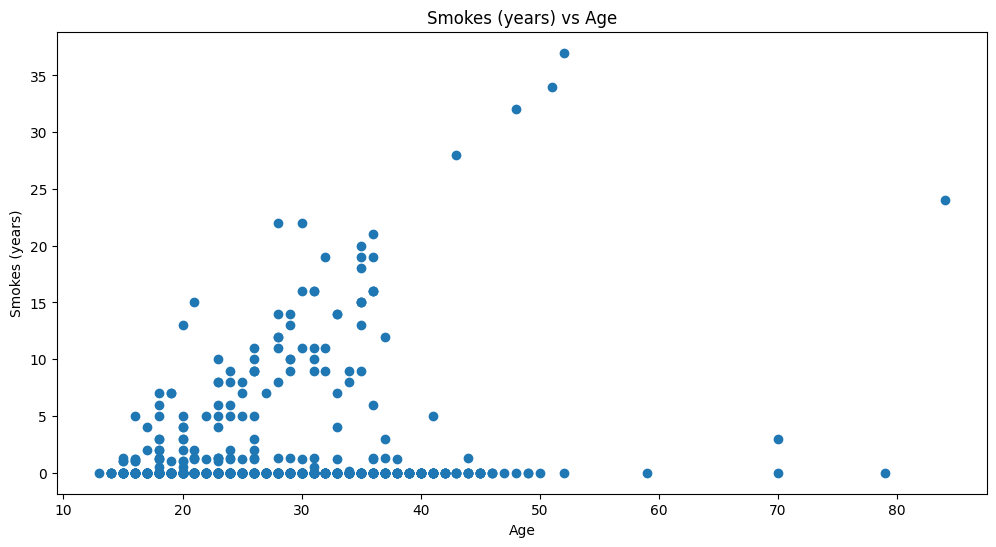

In [16]:
plt.figure(figsize=(12, 6))
plt.scatter(data_imputed['Age'], data_imputed['Smokes (years)'])
plt.xlabel('Age')
plt.ylabel('Smokes (years)')
plt.title('Smokes (years) vs Age')
plt.show()

For the same reason as the previous scatterplot. We are checking if the usage per year is lower than the age to make sure that the data is correct and realistic.

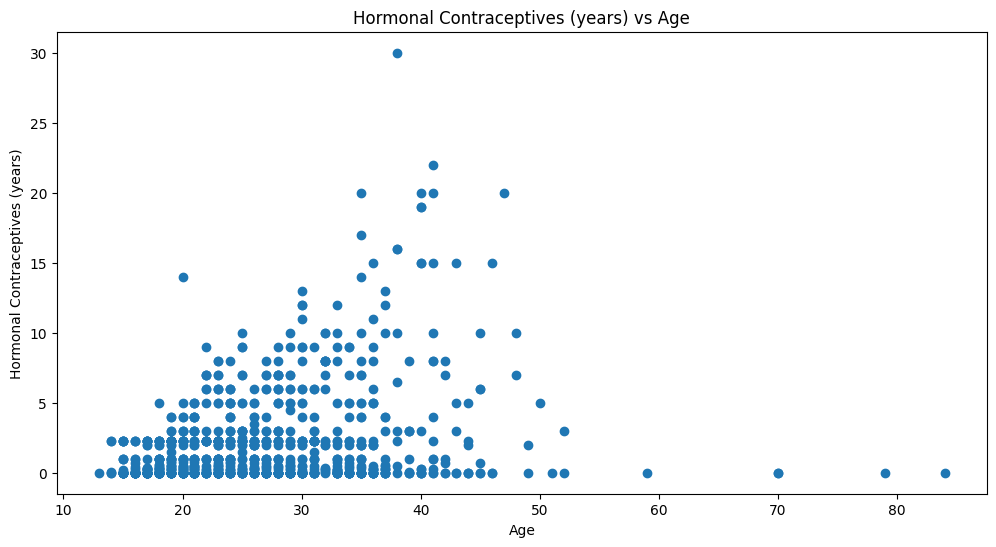

In [18]:
plt.figure(figsize=(12, 6))
plt.scatter(data_imputed['Age'], data_imputed['Hormonal Contraceptives (years)'])
plt.xlabel('Age')
plt.ylabel('Hormonal Contraceptives (years)')
plt.title('Hormonal Contraceptives (years) vs Age')
plt.show()

For the same reason as the previous scatterplot. We are checking if the usage per year is lower than the age to make sure that the data is correct and realistic. By the looks of it a IUD is in most cases barely or not used at all by people of age 50 or lower. There is barely any data on people older than 50 so it is impossible to make a similar statement for elderly people.

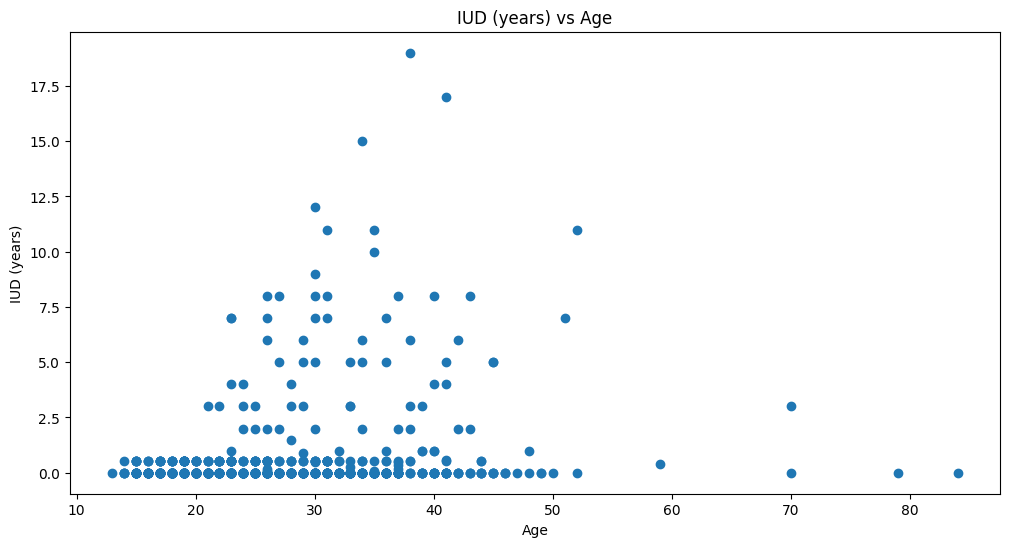

In [17]:
plt.figure(figsize=(12, 6))
plt.scatter(data_imputed['Age'], data_imputed['IUD (years)'])
plt.xlabel('Age')
plt.ylabel('IUD (years)')
plt.title('IUD (years) vs Age')
plt.show()


# Feature selection

Now that we dealt with missing and unknown data, we can now continue to selecting the correct features for the model. If we add any feature that doesn't make sense or add noise it won't really help with the prediction. So we will check the correlation to see which features do well and in combination with what it will do well. Below you can see the exact numbers printed out and see the correlation between each feature.

In [10]:
corr_matrix = data_imputed.corr()
corr_matrix

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.084896,0.369168,0.526137,0.055813,0.217349,0.131180,0.065624,0.277181,0.267662,...,0.038546,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,0.084896,1.000000,-0.147937,0.076719,0.238078,0.177117,0.175153,0.006342,0.018552,0.030005,...,0.013871,0.051559,0.022309,0.015691,0.027264,0.022982,-0.039273,-0.008899,0.021839,-0.001429
First sexual intercourse,0.369168,-0.147937,1.000000,-0.058223,-0.123602,-0.058366,-0.056332,0.018344,0.008000,-0.020975,...,0.033112,-0.013327,0.067283,-0.032626,0.043966,0.035750,-0.016546,0.003493,-0.010971,0.007262
Num of pregnancies,0.526137,0.076719,-0.058223,1.000000,0.080768,0.174912,0.097044,0.142858,0.207839,0.198550,...,-0.028162,0.033514,0.035123,0.007344,0.046753,0.019025,0.038685,0.087687,-0.029656,0.043460
Smokes,0.055813,0.238078,-0.123602,0.080768,1.000000,0.723128,0.493361,-0.002165,0.044157,-0.051184,...,0.049171,0.095433,-0.011027,-0.042822,0.012210,-0.067614,0.034527,0.053613,-0.003913,0.029091
Smokes (years),0.217349,0.177117,-0.058366,0.174912,0.723128,1.000000,0.724116,-0.011002,0.048899,0.027562,...,0.050935,0.081676,0.054674,-0.030966,0.057214,-0.048894,0.071232,0.094640,-0.006750,0.061484
Smokes (packs/year),0.131180,0.175153,-0.056332,0.097044,0.493361,0.724116,1.000000,0.005880,0.040112,0.007891,...,-0.008410,0.032186,0.108476,-0.021127,0.110366,-0.033358,0.026662,0.017954,0.004613,0.024657
Hormonal Contraceptives,0.065624,0.006342,0.018344,0.142858,-0.002165,-0.011002,0.005880,1.000000,0.448574,0.033729,...,0.039040,-0.050660,0.026407,-0.003334,0.038038,-0.001723,0.033551,-0.004247,-0.011030,0.007711
Hormonal Contraceptives (years),0.277181,0.018552,0.008000,0.207839,0.044157,0.048899,0.040112,0.448574,1.000000,0.094953,...,0.052059,-0.037219,0.054627,0.003086,0.061394,-0.012865,0.038825,0.078707,0.074324,0.078995
IUD,0.267662,0.030005,-0.020975,0.198550,-0.051184,0.027562,0.007891,0.033729,0.094953,1.000000,...,-0.018574,0.029871,0.110541,0.051833,0.058154,0.138905,0.044059,0.084074,0.007348,0.051554


Underneath you can see the same correlation as above but now the colours are also given out. The numbers are hard to see but the colors will help us quickly which feature in combination with what do well. The correlation that was printed before can be used to see the exact numbers. It seems that the following correlate highly with eachother. Every feature that is mentioned does not correlate highly with everything but at least with 1 of the mentioned features:
- STDs
- STDs (number)
- STDs: Condylomatosis
- STDs: cervical condylomatosis
- STDs: vaginal condylomatosis
- STDs: vulvo-perineal condylomatosis
- STDs: syphillis
- STDs: Pelvic inflammatory disease
- STDs: genital herpes
- STDs: molluscum contagiosum
- STDs: AIDS
- STDs: HIV
- STDs: Hepatitis B
- STDs: HPV
- DX
- DX: Cancer

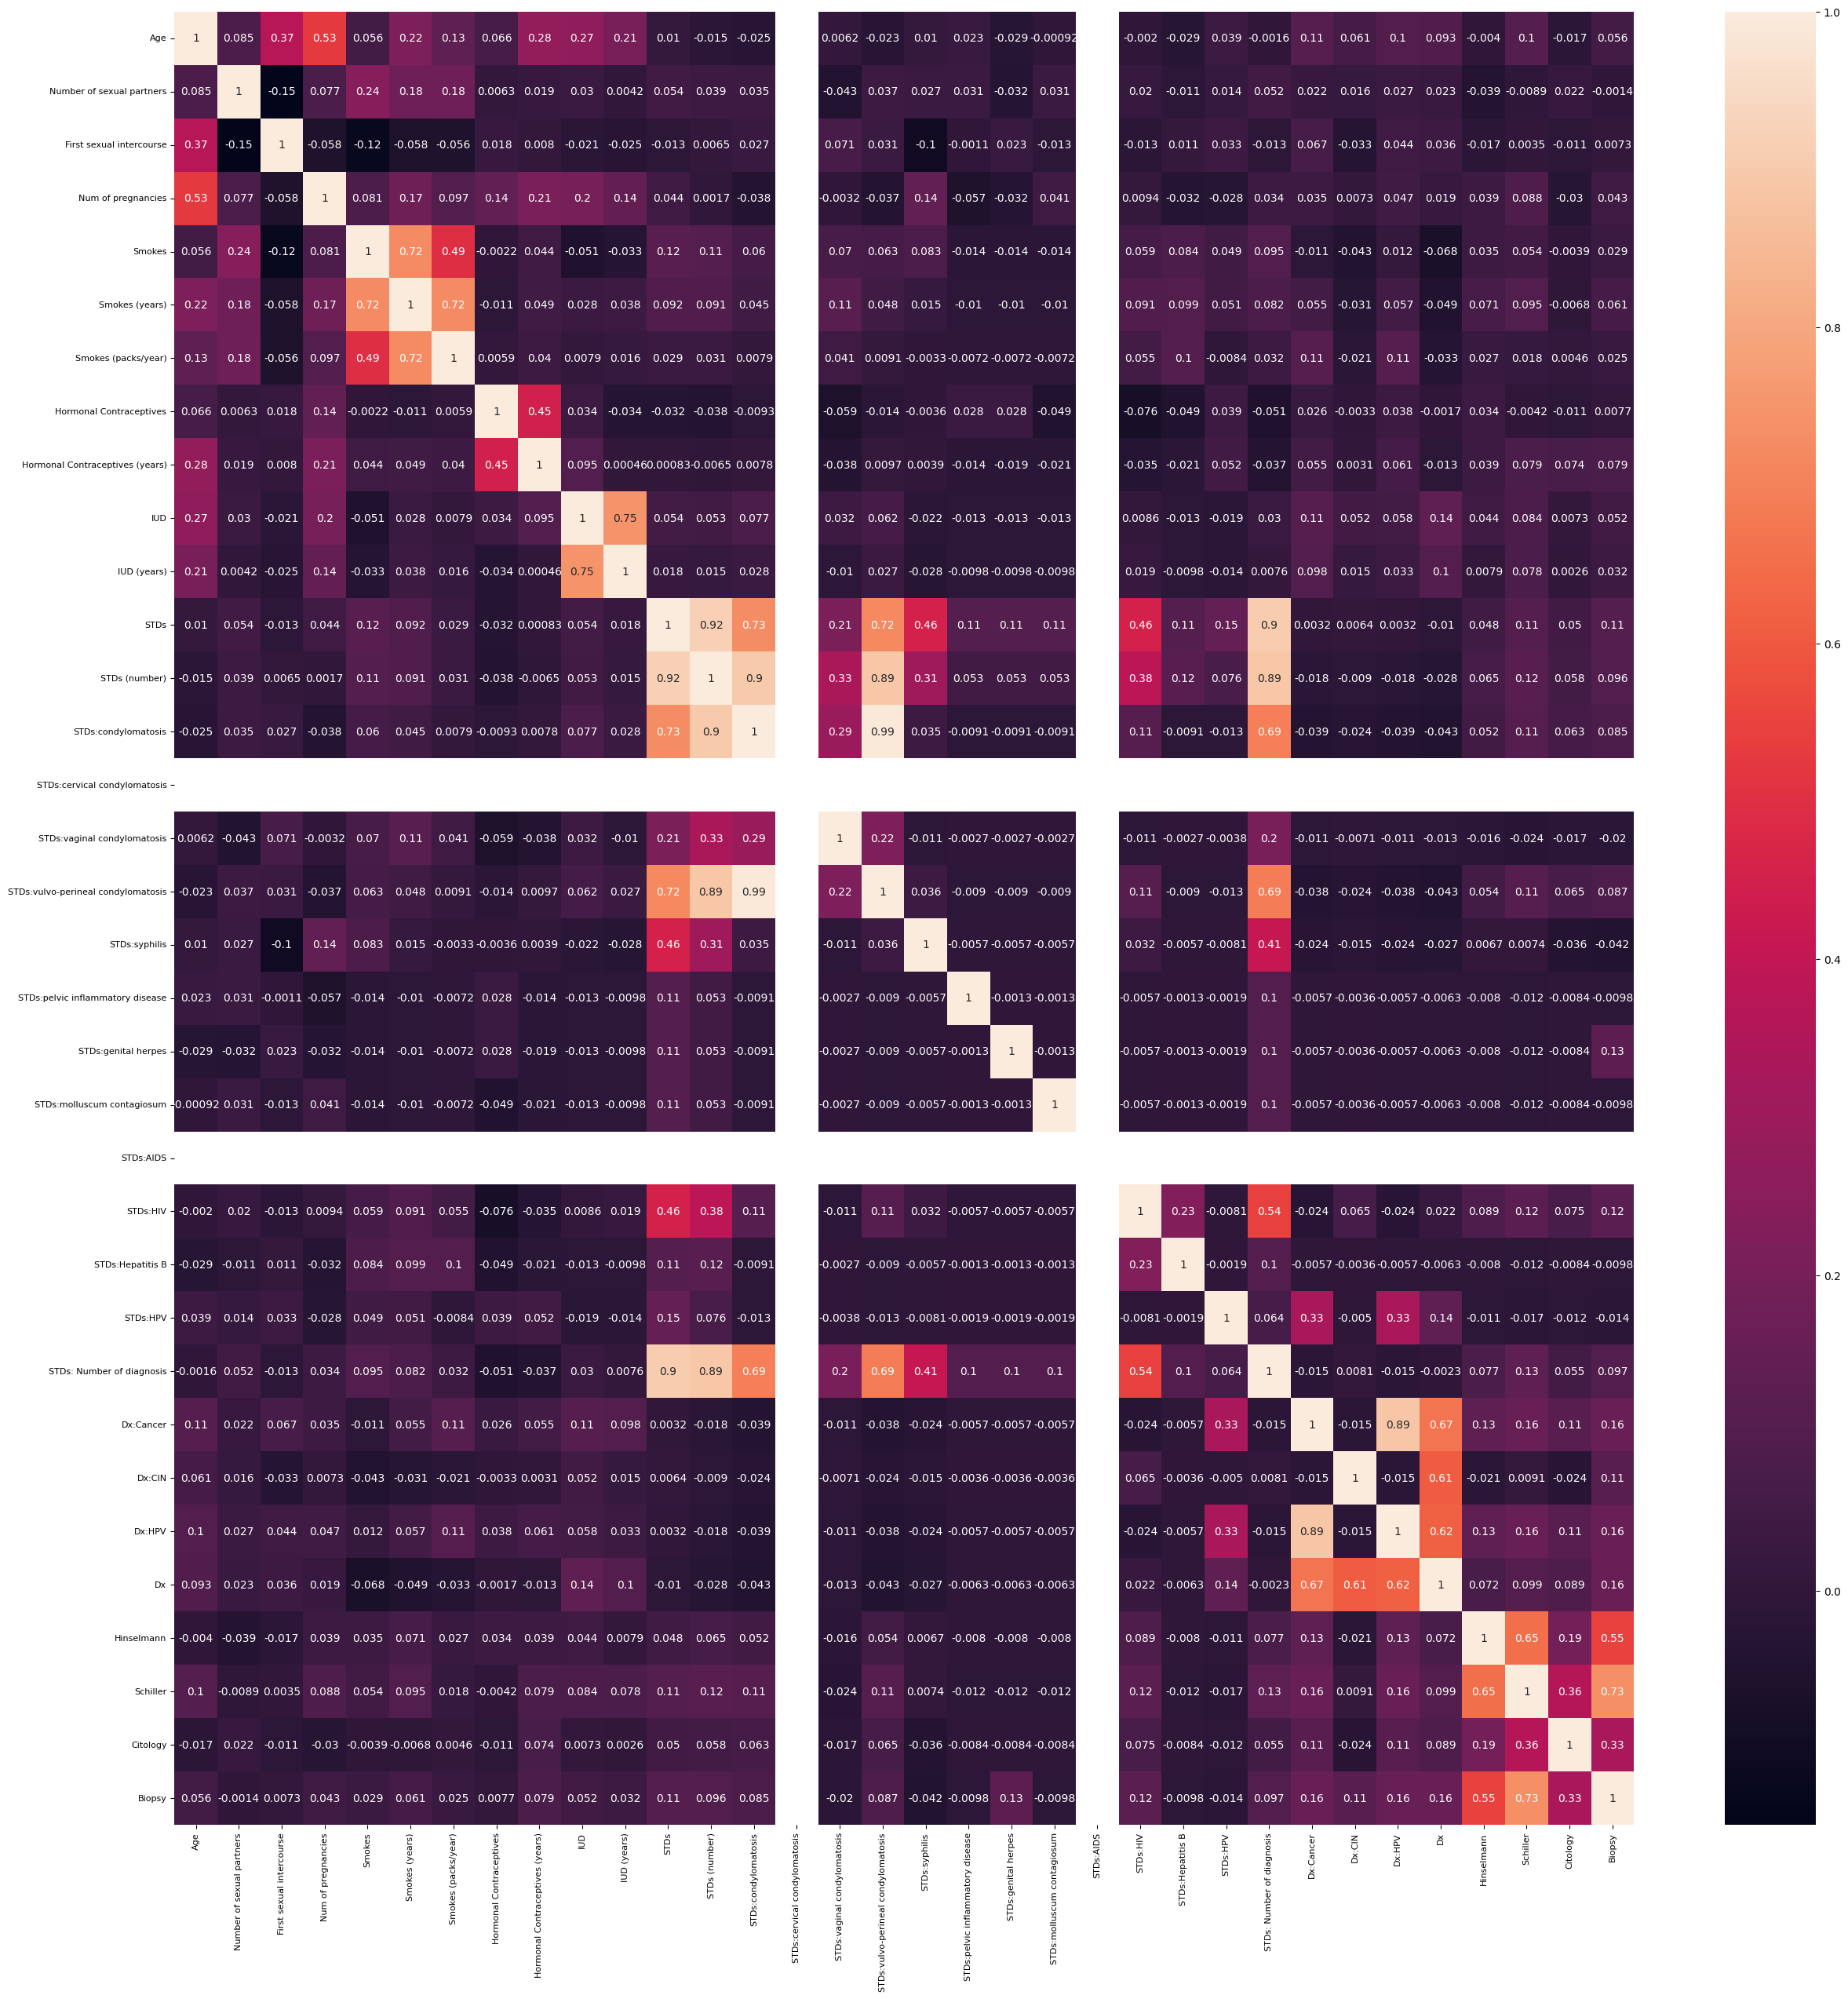

In [11]:
plt.figure(figsize = (30,30))
sns.heatmap(corr_matrix, annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.tick_params(labelsize=8)
plt.show()

a histplot is made underneath for all features to see what the often occured values are. This helps to see where to pay attention to, if patterns are noticed or anything else noteworthy. It is seen how most woman had sexual intercourse before the age of 20 and mostof the time between the ages of 15 and 17. This is good to know since the body is still in development and this will most likely increase the chacne for cervical cancer on these women. Mostpeople smoked for a year or less but a good amount of people smoked for a good portion of their lives. This is something to keep in mind. Pregnancies happend to the majority of the patients. mostpeople got either no pregnancies or between 1 and 3. After that the numbers drop down heavily but a minority still had more than 3 pregnancies. in 1 case even more than 10. This increases the chances of getting cervical cancer. When it comes to STDs it is noticeable how many people don't ever had it. Which means that a small portion of people who did get the disease are a exceptional group.

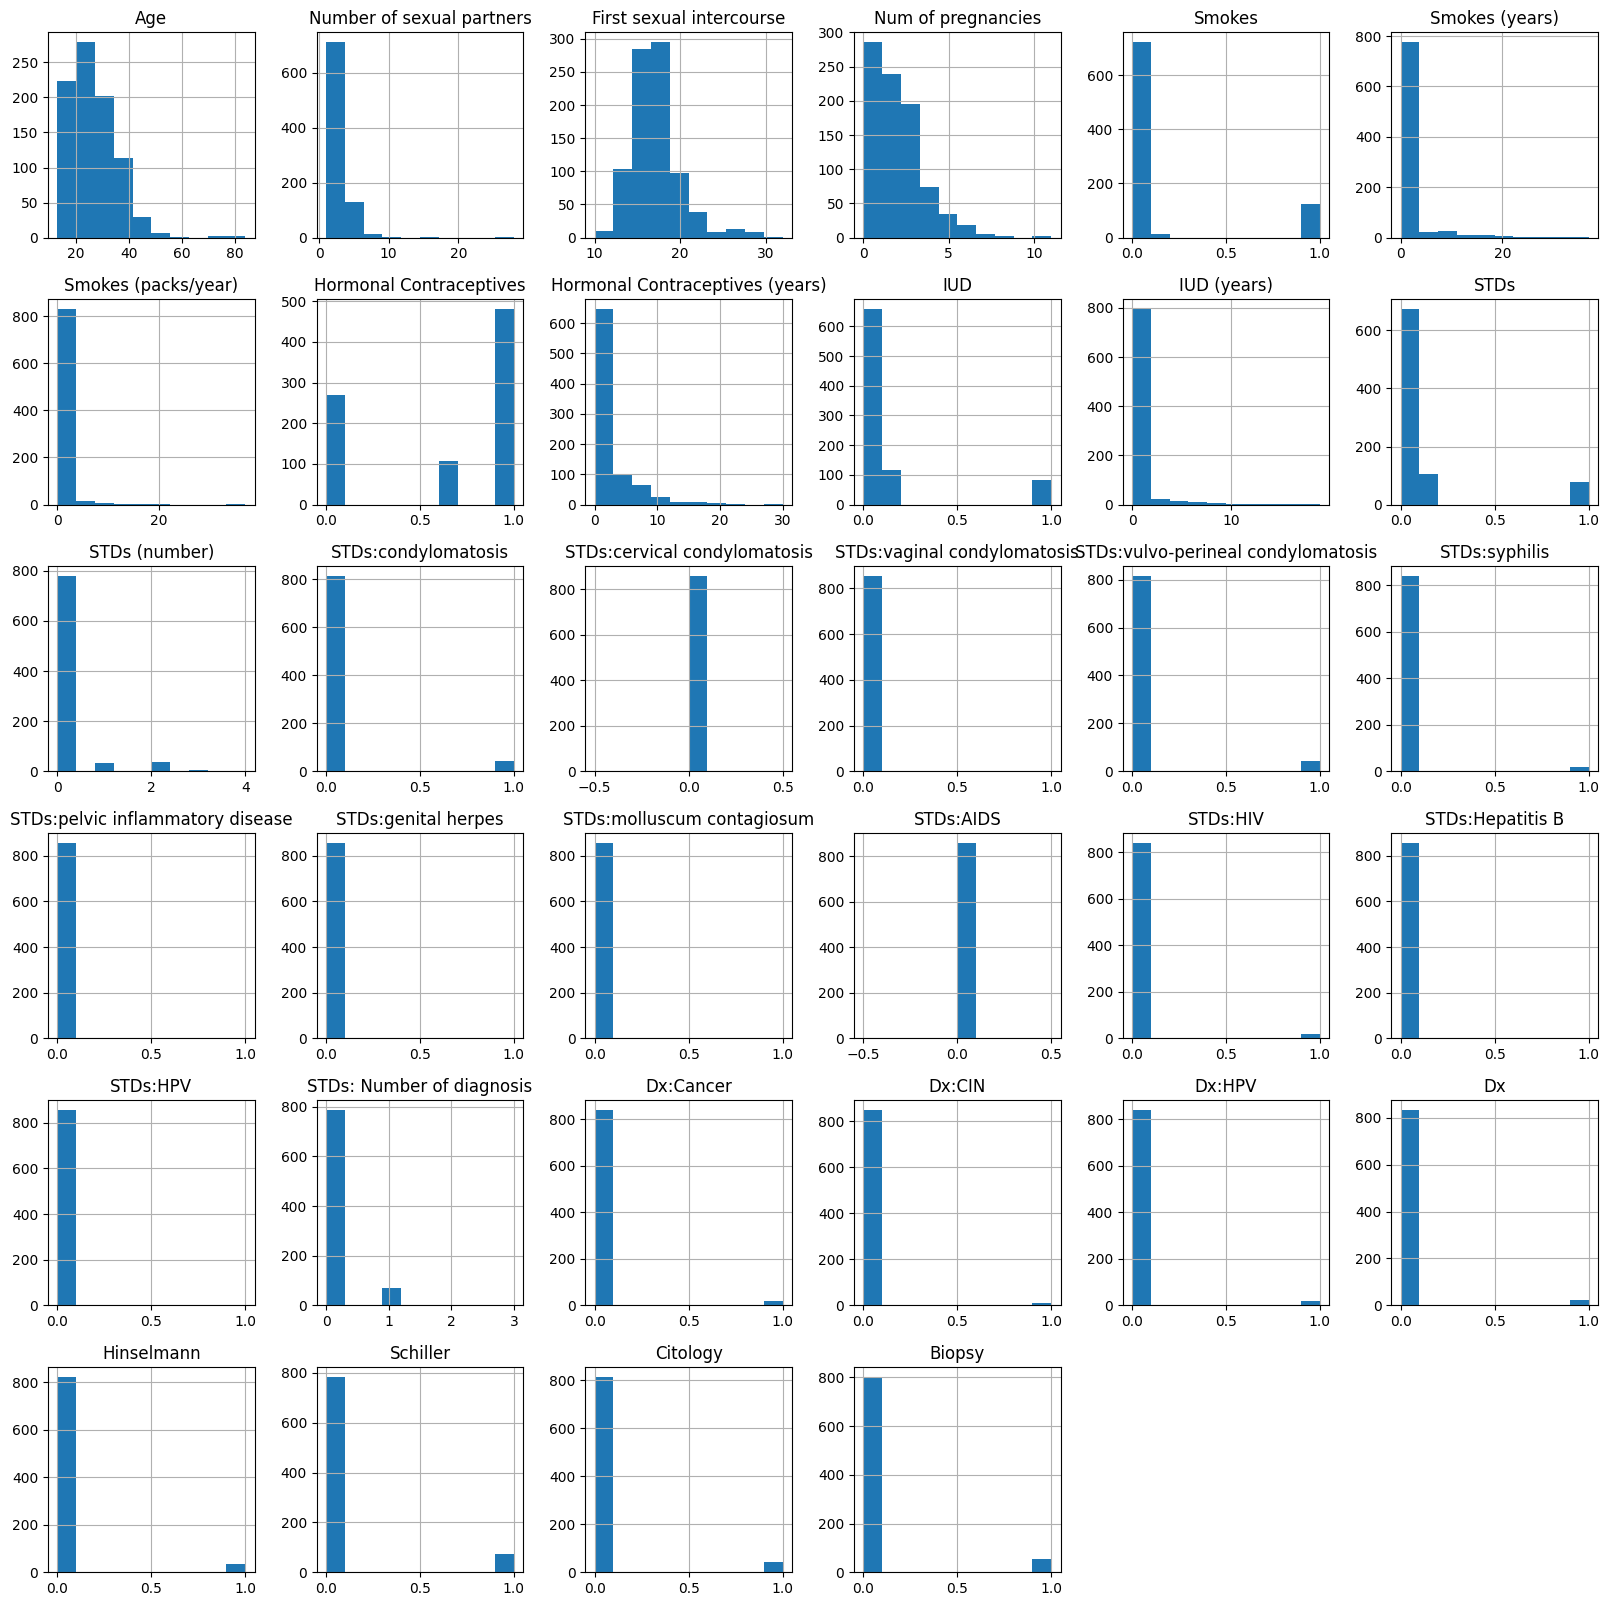

In [12]:
plot = data_imputed.hist(figsize=(20,20))

Dividing the difference between features used to determine the biopsy result. So Biopsy need to be dropped from features and become it's own variable. Otherwise the model can get confused by using the result in order to get the result.

In [13]:
features_knn = data_imputed.drop('Biopsy', axis=1)
target_knn = data_imputed['Biopsy']

In [14]:
x = features_knn
y = target_knn

# Splitting it betweeen train and test

So right now the data will be split between what things the data will be used to train on so that the model can teach itself how to make predictions. 75% will be used to be trained on while the remaining 25% will be used to test on. Since the dataset is available it will also be checked on how well the model performed by comparing the models input with the actual dataset. It is important that the model gets a lot to train with so that it is best prepared to making predictions

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=24)

Verifying if the split went well while also checking how many samples each section gets.

In [16]:
print("There are {} samples in the training set and {} samples in the test set".format(x_train.shape[0], x_test.shape[0]))

There are 643 samples in the training set and 215 samples in the test set


# Scaling

importing the scaler library while also initializing it. Scaling is sometimes required and can be helpful. Some algorithms get processed quicker when the features are on the same scale. It will also make sure that certain units that still represent the same thing will be put on the same level so that the model is less confused about the values that is put in. In this case it is used to put the variables to a standard range which will help the model since it uses a distance measure. Not only that but since the mean strategy has been used to impute the missing data, this will make sure that the data is stable and has less issues with noise.

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Modelling - KNN

The nearest neighbor model will be set as a baseline. The reason why is because the model is simple and straighforward to implemennt and understand. It gives out a quick result on how the model handles the dataset. This way we can see if the dataset is usable, how well the model (and possibily other models) performs on it and perhaps where the dataset need works. It can also show if models like knn is fit for the problem that we are trying to solve in the dataset.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

When the model is trained, the score is printed. On first glance it looks weird but instead of 0 to 100 percent, the score gets displayed in a value between 0 and 1. Currently the score is 0.9441860465116279. Let's round it up to 2 digits and we are looking at a 94% accuracy. That sounds great but now the question is how the model got to this result. Did it make proper use of the given data or was there another feature that the model wrongly used?

In [20]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy of the model is: ", accuracy)

The accuracy of the model is:  0.9441860465116279


Underneath we can see how the feature importance came to stand in the nearest neighbor model. It is seen that the schiller test and hinselmann test affects the result of the biopsy. It seems like a bit too much tests are having their influence on it but it also makes sense why these 2 features have such a big influence on it. This means in most times that a few tests is already performed on a patient and that more information was needed which is why a biopsy is performed. A pap smear test, schiller and Hinselmann test all are able to detect cancerous cells and/or abnormal cells. However the reason why a biopst is likely advised by doctors and GPs in the medical field is becausr a biopsy shows more information.

Unlike other tests, a biopsy allows for a definitive diagnosis by examining the cell and tissue structure in detail since the tissue will be put under a microscope and can be carefully analysed. By doing this, the analyst is able to see information about the cell type, the severity of how the cells act out, tissue changes and even a extent of abnormal cells. Compared to a pap smear and colposcopy (Hinselmann), a biopsy can confirm on what these 2 tests could only notice but not confirm the deeper details that come with it.

All the other features that are used have a impact but each has a small impact on the target. Nonetheless, every feature mentioned influences the risk of cervical cancer and it is good to see and confirm that the model makes use of these features.

So this basically tells us that the high accuracy score makes sense and why it makes sense.

Using 643 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 215/215 [17:41<00:00,  4.94s/it]


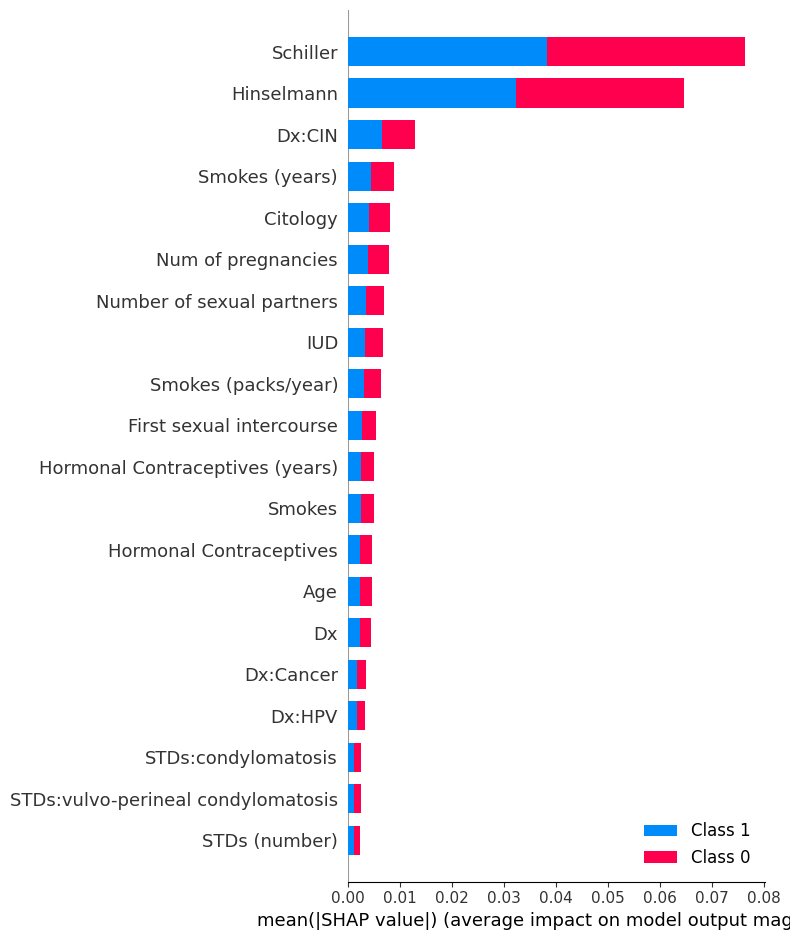

In [21]:
explainer = shp.KernelExplainer(knn.predict_proba, x_train)
shap_values = explainer.shap_values(x_test)
shp.summary_plot(shap_values, x_test, feature_names=features_knn.columns)

Underneath we can see not only how well it performed but also how well it performed per possible answer. we can see that 95% of the result being 0 got answered correctly. However when it comes to the answer of 1, which is the situation when a biopsy is advised, the model was just for 67% accurate. It sounds like a promising nomber to be better. However, the models answer currently will do a lot of haarm. By giving out a false negative the model basically lets people that need a biopsy walk out without being tested which could mean that a person that potentionally has cervical cancer is walking out the hospital not knowing she got cancer. Early detection when it comes to all kinds of cancer is incredibly important since later stages of cancer can be more aggresive and hard to treat. To understand what is going on and how the moel is making it's chocies, the feature importance shall be checked.

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       201
         1.0       0.67      0.29      0.40        14

    accuracy                           0.94       215
   macro avg       0.81      0.64      0.69       215
weighted avg       0.93      0.94      0.93       215



# Modelling - Decision tree

Decision tree will be now used to check on the feature importance. The great thing about decisiontree is that it can be found which steps it takes in order to make choices. That information on top of the information wihch features are being used and how important they are will be a great help to answering why the nearest neigbor had a high overall accuracy but a low accuracy for everything that needs to result in a 1. On top of that it would also show if the features are being correctly used, help creating new features and understand the models way of working. It is important to note that if a feature is not used, it doesn't mean it is useless. It simply means that the model deemed the feature as not important.

Just like the previous model. The model decision tree is being set up. This must happen everytime a new model is being used or when you want save a model into a name that you can use however pleased.

In [23]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier()

The model is now being trained. This time we didn't split the data since the previous split still exists and the decision tree can use that too.

In [24]:
DecisionTree.fit(x_train, y_train)
y_pred = DecisionTree.predict(x_test)

We're checking the score again and this model scored slitghtly higer which is good. Now we can look at the decision trees decision and feature importance knowing why it scored so high. If the accuracy was low than it wouldn't have been worth looking at it.

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy of the model is: ", accuracy)

The accuracy of the model is:  0.9720930232558139


After checking the feature importance it is clear that most choices are based on the schiller feature, around 10 percent is based on age, total number of pregnancies and at what age the person had intercourse for the first time. The reamaining features that are used as well got a importance of 1 percent till 3 percent. But this looks fine, it makes sense the way it is.

A schiller test is a test where a iodine solition is applied to the cervix in order to detect anything abnormal. A healthy response would be that the solution stains brown where abnormal areas do not take up the stain. When this is noticed, only then a biopsy is performed to examine the abnormal area. This makes sense why schiller is a feature that is heavily used since most people that did the schiller test also did a biopsy. And that is something the model most likely recognized.

the 3 features that score around 10% also makes sense why they are chosen. elderly and middle aged woman have a higher chance of developing cervical cacner while woman under 30 rarely get it and woman under 20 is almost unheard of. But in theory possible. number of pregnancies and when a person ahd dher first sexual intercourse also influence the chance of a person getting cervical cancer. When a person has intercourse at a young age, age 17 or below, the person woman develops a increased chance of getting cervical cancer. The reason why is because the uterus is still in development and intercourse might confuse the hormones and development of the uterus.

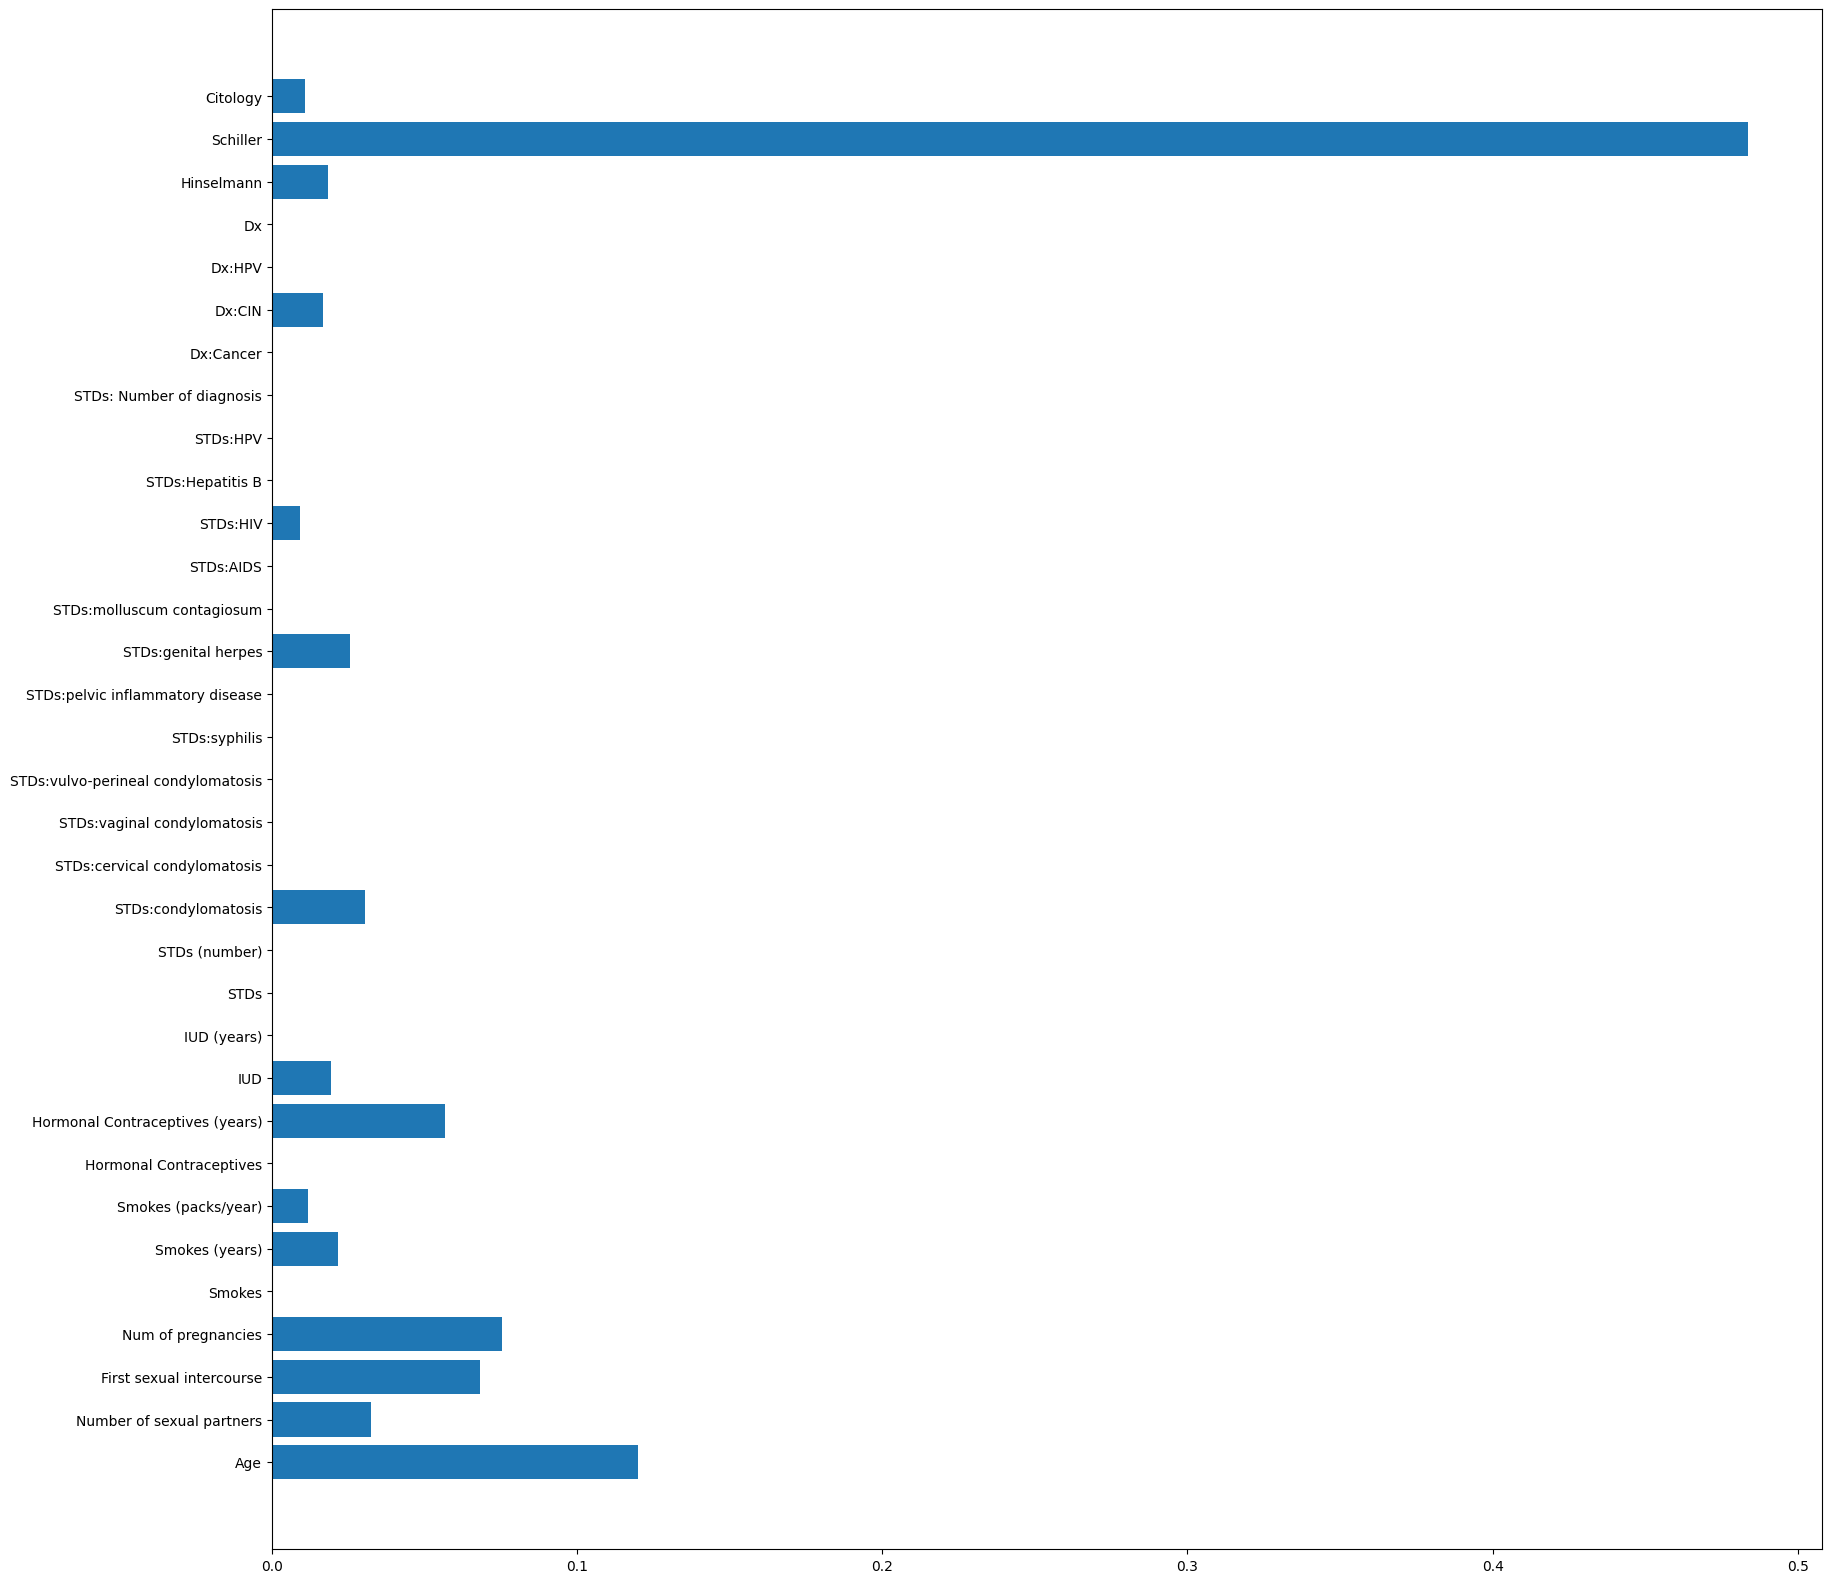

In [26]:
importance = DecisionTree.feature_importances_
column_names = data_imputed.drop('Biopsy', axis=1).columns

plt.figure(figsize=(20,20))
plt.barh(column_names, importance)
plt.show()

Now that it is clear where the choices of the decision tree is mostly based on and how it got such a high number I want to see on the feature importance per answer. As in what features is used by the model to came to the conclusion that the answer is 0 or 1. for that I will be using the shap values since it a handy tool to explain things. Shap can explain things like the importance of a feature, if it impacts i positively or negatively, in which answers it help and so in. The decision tree will be used for the explainer. This is required to let the shap function explain how high the feature importance are and in what way. If it receives no model to works with it can't check what is going on in the model we want to see and will have nothing to look at.

In [27]:
explainer = shp.TreeExplainer(DecisionTree)
shap_values = explainer.shap_values(x_test)

The feature importance looks to be the same just as in the previous plot which is good. It would be weird to have 2 plots that were supposed to show the same thing with different details but somehow are not the same. We can see that influence the features has on both the 0 and 1 value are the same. The features have a equel impact on both answers. No new info is retrieved but at least it is confirmed how the model get it's answer.

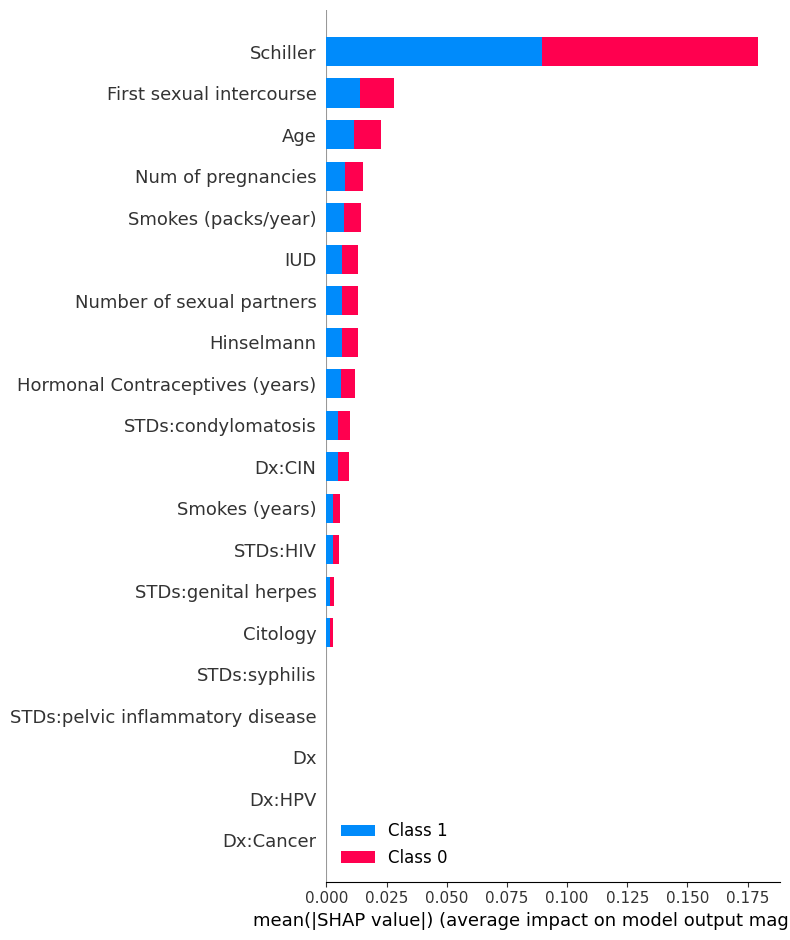

In [28]:
shp.summary_plot(shap_values, x_test, feature_names=column_names)

By checking the report on this model we can see that it did better compared to the nearest neighbor model. There is a 3% increase on accuracy for results that were supposed to be a 0 and a 11% increase on the answers that is supposed to be a 1. Which is interesting to see because the nearest neighbor model scored less on class 1 but when the feature importance was checked, it made sense why it choose those specific features. Despite that, even this score is far from good enough to use it in the medical field. The fact that 18% of the answers was wrong means that 18% are false negatives which means that the model would let 18% who do need a biopsy leave the hospital without detecting the possibilities of that the person got cervical cancer.

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       201
         1.0       0.83      0.71      0.77        14

    accuracy                           0.97       215
   macro avg       0.91      0.85      0.88       215
weighted avg       0.97      0.97      0.97       215



# Putting the results in risk zones

Now that we've seen how the models handles the data after modifying it to our wishes and in the decision tree case sees which features play a role and how important they are in the models probability, it is time to put the results of the patients from a yes/no answer to a probability shown as a continious value. As was mentioned in the beginning. It can happen that several people need a biopsy However a person that is in her twenties, healthy and got a small but realistic risk does not have the same urgency as a elderly woman who smoked her whole life. That is because the younger healthy woman is not in the risk group while the elderly woman is. By checking the probability of the model and sorting them into zones does not only help to see the severity of someones situation, but this will help medical staff to choose who to invest their time and resources on first. By prioritising people in need first and being able to identify them, it will help save lifes for sure.

As usual, any libraries that is not yet required will now be imported.

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

As a follow up a model is chosen and trained

In [31]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

Then the model is going to be calibrated and saved for later use. The reason why the model is getting calibrated is so that the predictions will be more accurate and stable later on. It will take the model as it is currently which is why the parameter for "cv" is prefit. This tells the program that the model is already trained and to use the predictions that the trained model gives. The sigmoid method also goes by the name "platt scaling" is used because it fits a logistic regression model to the already predicted probabilities of random forest. This method transforms the output of the classifier into a calibrated probability with the use of a logistic function.

In [32]:
calibrated_model = CalibratedClassifierCV(model, method='sigmoid', cv='prefit')
calibrated_model.fit(x_train, y_train)

CalibratedClassifierCV(cv='prefit', estimator=RandomForestClassifier())

Now we check on how the calibrated model performs. we see a 1% decrease in accuracy in class 0 but a increase of 8% in class 1 compared to the last classification report. This isn't the final step of this model since this is just a step into getting a continious value as a answer given out in percentage. Nonetheless these numbers look good and it confirms that we can move on to the next step. There is no use into going on with the next step when it performs poorly. The issue with that there is still too many false negatives occur.

In [33]:
y_pred = calibrated_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       201
         1.0       1.00      0.36      0.53        14

    accuracy                           0.96       215
   macro avg       0.98      0.68      0.75       215
weighted avg       0.96      0.96      0.95       215



because calibrated model seems to be working well the next step will be taken.Which is that the probabilities will now be extracted for the second class so that the positive biopsy result can be used for each test sample.

In [34]:
probabilities = calibrated_model.predict_proba(x_test)

biopsy_probabilities = probabilities[:, 1]

A treshold now will be created. This is for 2 reasons. The first one is that the model will now say that everyone that has a positive number in their probability needs a biopsy. Which means that a person with 1% probability gets the same answer as someone with 90% probability. This does not make sense. There needs to be a clear line on when it is advised to get a biopsy and who needs it the most so that the medical staff can focus their time and resources on the ones that need it the most.

In [35]:
threshold = 0.08
biopsy_predictions = [1 if prob >= threshold else 0 for prob in biopsy_probabilities]

After the extraction it is seen in the report that it improved. Class 0 can be predicted with 2% improvement and for class 1 there is a improvement of 5%. This is the highest accuracy score so far 9% are still false negatives which feels like it is still a little too high. Let's see how the numbers look like when the probability in percentage is printed out.

In [36]:
print(classification_report(y_test, biopsy_predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       201
         1.0       0.80      0.86      0.83        14

    accuracy                           0.98       215
   macro avg       0.90      0.92      0.91       215
weighted avg       0.98      0.98      0.98       215



Over here we are printing the result for each patient to see how confident the model is in it's pediction. Not only that but we also print out under the probability if a biopsy is required or not. The recommendation messages is based on the treshold given. That line is normally the true or false answer the model returned but this time the model only does it if it goes above the treshold which was created earlier. But that is added just to make it easier to control how the result is displayed. currently the percentage given of the probability matters. Currently the model now gives a 0 or 1 answer but we now see how confident the model is in it's prediction. The report earlier, we can see who the model thinks needs a biopsy or not. Now for the next step we will print out all the errors and predictions so we can manually check on them just to see how far the model is off compared to the real result that is in the dataset.

In [37]:
for i, prob in enumerate(biopsy_probabilities):
    prob_percentage = prob * 100
    print(f"Result {i + 1}: Probability of biopsy: {prob_percentage:.2f}%")
    if biopsy_predictions[i] == 1:
        print("Biopsy Recommended")
    else:
        print("Biopsy Not Recommended")


Result 1: Probability of biopsy: 31.30%
Biopsy Recommended
Result 2: Probability of biopsy: 23.10%
Biopsy Recommended
Result 3: Probability of biopsy: 0.35%
Biopsy Not Recommended
Result 4: Probability of biopsy: 0.13%
Biopsy Not Recommended
Result 5: Probability of biopsy: 0.13%
Biopsy Not Recommended
Result 6: Probability of biopsy: 0.13%
Biopsy Not Recommended
Result 7: Probability of biopsy: 0.18%
Biopsy Not Recommended
Result 8: Probability of biopsy: 0.23%
Biopsy Not Recommended
Result 9: Probability of biopsy: 0.13%
Biopsy Not Recommended
Result 10: Probability of biopsy: 0.13%
Biopsy Not Recommended
Result 11: Probability of biopsy: 0.13%
Biopsy Not Recommended
Result 12: Probability of biopsy: 0.13%
Biopsy Not Recommended
Result 13: Probability of biopsy: 0.13%
Biopsy Not Recommended
Result 14: Probability of biopsy: 0.13%
Biopsy Not Recommended
Result 15: Probability of biopsy: 0.13%
Biopsy Not Recommended
Result 16: Probability of biopsy: 0.15%
Biopsy Not Recommended
Result 

By comparing the the list underneath witht the probability result on the list above we can see that the model is not perfect like expected. However what is interesting to see is that des correct answers about someone  needed a biopsy exist because the model advised for 53% for a biopsy but because it was a classifier it would be rounded up to 100%. Which means that despite the high accuracy score, it is still mostly based on rounded up numbers by the classifier. This does show how we need a regression model for this since the model still can't accuractly predict which shows.

In [38]:
predictions = calibrated_model.predict(x_test)

prediction_overview = pd.DataFrame()
prediction_overview["truth"] = y_test
prediction_overview["prediction"] = predictions
prediction_overview["error"] = prediction_overview["truth"] - prediction_overview["prediction"]
prediction_overview["error"] = abs(prediction_overview["error"])
prediction_overview = prediction_overview.reset_index(drop=True)
print(prediction_overview.to_string())

     truth  prediction  error
0      1.0         0.0    1.0
1      1.0         0.0    1.0
2      0.0         0.0    0.0
3      0.0         0.0    0.0
4      0.0         0.0    0.0
5      0.0         0.0    0.0
6      0.0         0.0    0.0
7      0.0         0.0    0.0
8      0.0         0.0    0.0
9      0.0         0.0    0.0
10     0.0         0.0    0.0
11     0.0         0.0    0.0
12     0.0         0.0    0.0
13     0.0         0.0    0.0
14     0.0         0.0    0.0
15     0.0         0.0    0.0
16     0.0         0.0    0.0
17     0.0         0.0    0.0
18     0.0         0.0    0.0
19     0.0         0.0    0.0
20     0.0         0.0    0.0
21     0.0         0.0    0.0
22     0.0         0.0    0.0
23     0.0         0.0    0.0
24     0.0         0.0    0.0
25     0.0         0.0    0.0
26     0.0         0.0    0.0
27     0.0         0.0    0.0
28     0.0         0.0    0.0
29     0.0         0.0    0.0
30     0.0         0.0    0.0
31     0.0         0.0    0.0
32     0.0

The function gets created where we put everything into a zone. as of now I put the probability for green on 10% or less, yellow is 20% or less, orange is 30% or less and everything else goes into the red zone. This is to see if it all works correctly and everything gets sorted to the zone it should be. I will go over this with my stakeholder to calculate which zone should receive which patients. despite not being fully accurate numbers, to put the chances in zones like this is fine according to the stakeholder. The stakeholder that went over the app is a general practicioner and advised me to keep the zone values simple and even advised me these numbers per zone.

In [39]:
def get_zone(probability):
    if probability < 0.1:
        return 'Green'
    elif probability < 0.3:
        return 'Yellow'
    elif probability < 0.5:
        return 'Orange'
    else:
        return 'Red'

Over here we can see the result. All 215 patients got sorted into the colours depending on their probability. The total amount sums up. Which means nobody got left out. Now that we were able to sort them according to the probability the model gave, we are now able to put out a message on the application saying how urgent the situation is and why. Without the risk zones, the user would only be able to see if the patient need a biopsy or not without knowing how urgent they need it. 

In [40]:
zone_counts = {zone: 0 for zone in ['Green', 'Yellow', 'Orange', 'Red']}
for prob in biopsy_probabilities:
    zone = get_zone(prob)
    zone_counts[zone] += 1

print(zone_counts)

{'Green': 200, 'Yellow': 7, 'Orange': 3, 'Red': 5}


Out of curiousty, we will now make use regressor models by changing the dataset. The target biopsy currently has a range of 0 to 1. But in order to get a answer in percentage we will now change the 1 into a 100 so a range between 0 and 100 exists. The regressor models can work with that and this would mean that the answer that will be given to us will still be based on the features that we've been working with the whole time but the format of the target will be different. Which is exactly what we want since the target must come in percentage to work with the application.

Under the column "biopsy" you can see if the 1 became a 100. 

In [41]:
# change the 1 in biopsy to 100
data_imputed['Biopsy'] = data_imputed['Biopsy'].replace(1, 100)
data_imputed.sample(20)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
16,41.0,4.0,21.0,3.000000,0.0,0.000000,0.000000,1.000000,0.250000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188,27.0,5.0,19.0,2.000000,0.0,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
682,70.0,1.0,16.0,10.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,30.0,5.0,16.0,4.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
741,19.0,2.0,14.0,2.000000,0.0,0.000000,0.000000,0.641333,2.256419,0.112011,...,0.002656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124,30.0,3.0,17.0,4.000000,0.0,0.000000,0.000000,1.000000,12.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
273,24.0,3.0,14.0,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
714,29.0,2.0,17.0,2.000000,0.0,0.000000,0.000000,1.000000,7.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
689,24.0,1.0,21.0,2.275561,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
694,28.0,2.0,15.0,2.275561,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Since we data got changed we have to tell the program again what of the data is a usefull feature and what the target is. The same steps as the last time is taken.

In [42]:
features_rf = data_imputed.drop('Biopsy', axis=1)
target_rf = data_imputed['Biopsy']

We're spliting the data again so we got the model something to train with and something to test with. This time we'll be giving the model 80% to train with. I gave it 5% more data to work with this time because I want to give the model a better chance to understand the data better.

In [43]:
x_train, x_test, y_train, y_test = train_test_split(features_rf, target_rf, test_size=0.20, random_state=24)
print("There are {} samples in the training set and {} samples in the test set".format(x_train.shape[0], x_test.shape[0]))

There are 686 samples in the training set and 172 samples in the test set


Since the data got a slight modification we will apply the scaler again for the same reason as in the beginning. To stabilize the data and to make it work well with nearest neighbor.

In [44]:
scaler = StandardScaler()

In [45]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

We'll be applying nearest neighbor the same way as we did in the beginning. But pay close attention, instead of KNeighborsClassifier it is now called KNeighborsRegressor. By now it would make sense but at the end of the name it says if it is a classifier or regressor. And we made build-up to the use of a regressor so KNeighborsRegressor is what we are going for now. Nonetheless, the way of training data, inserting it, tuning the hyperparameters is exactly the same. But instead of a low or high accuracy. The models performance will now be shown by checking the errors and printing outn the mean squared root or checking the coefficient of datermination (r2).

In [46]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

The model is trained and the performance is shown underneath. We can see that the model didn't do well. There is a lot of errors according to the output of the mean_squared_error and a low score coming from r2. This means that the model didn't perform well and had most of it's results wrong. Let's have a closer look at how far the model was per patient by printing out the error, truth and prediction.

In [47]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("The mean squared error of the model is: ", mse)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("The R2 score of the model is: ", r2)

The mean squared error of the model is:  481.7275747508306
The R2 score of the model is:  0.19528918286682273


By checking the list we can see that false negatives and false positives occur. False positives, despite being something we don't want isn't that bad since it would mean that a healthy person is getting checked. Not the desirable outcome but it harms no one. But what also occurs is false negatives. a lot of it too. Not a single time was the model able to fully say if someone who needs a biopsy should get a biopsy. It came close a few times. Like the first petient got 71,42% advise to get a biopsy. but sometimes it is far off while a person need it like the second patient. The patient needs a biopsy but doesn't get the advise to get herself check. Not even by 1%.

This means that the model now is far from useful compared to the classifier models because it rarely comes close to a correct guess and most of the time it is far off or even says the complete opposite. On the other hand we can now see what the model actually thinks. With the classifier the model had to round it up to a 0 or 1 and the reason it scored so highly was becausen the model made educated guesses. Now we don't allow the model to do that anymore.

In [48]:
predictions = knn.predict(x_test)

prediction_overview = pd.DataFrame()
prediction_overview["truth"] = y_test
prediction_overview["prediction"] = predictions
prediction_overview["error"] = prediction_overview["truth"] - prediction_overview["prediction"]
prediction_overview["error"] = abs(prediction_overview["error"])
prediction_overview = prediction_overview.reset_index(drop=True)
print(prediction_overview.to_string())

     truth  prediction       error
0    100.0   71.428571   28.571429
1    100.0    0.000000  100.000000
2      0.0   14.285714   14.285714
3      0.0    0.000000    0.000000
4      0.0    0.000000    0.000000
5      0.0    0.000000    0.000000
6      0.0   14.285714   14.285714
7      0.0    0.000000    0.000000
8      0.0    0.000000    0.000000
9      0.0    0.000000    0.000000
10     0.0    0.000000    0.000000
11     0.0    0.000000    0.000000
12     0.0    0.000000    0.000000
13     0.0    0.000000    0.000000
14     0.0    0.000000    0.000000
15     0.0    0.000000    0.000000
16     0.0    0.000000    0.000000
17     0.0   14.285714   14.285714
18     0.0    0.000000    0.000000
19     0.0    0.000000    0.000000
20     0.0    0.000000    0.000000
21     0.0    0.000000    0.000000
22     0.0    0.000000    0.000000
23     0.0   85.714286   85.714286
24     0.0   14.285714   14.285714
25     0.0    0.000000    0.000000
26     0.0    0.000000    0.000000
27     0.0    0.0000

Now a support vector regression is used for the same goal as we just did with nearest neighbor but it will act much better. A support vector regression (SVR for short) will use varying amounts of support vectors based on the data and the hyperparameters (which we will leave empty to the default setting is used). With nearest neighbor we would have to change the k value ourselves each time. K value exists as part of the model with nearest neighbor you would say how many supporters can vote. at default it is 3 but we are free to set it to what we want. But finding a good value can take too much time which is what SVR will help us with.

In [49]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(x_train, y_train)
predictions = svm.predict(x_test)

Because the SVR adapted it's supporters based on the dataset and it's complexity we now get a totally different result according to the list. However the score and list shows that the model is doing worse than before. It makes more mean squared errors and overall in the truth/prediction/error list we can see more occurences of errors and even errors that are more off than before. But since SVR adapts to the dataset and the fact that this is a regression helps us show what the model thinks. Let's go over the shap explainer and see how it came to this conclusion.

In [50]:
mse = mean_squared_error(y_test, predictions)
print("The mean squared error of the model is: ", mse)

The mean squared error of the model is:  625.1826064235861


In [51]:
prediction_overview = pd.DataFrame()
prediction_overview["truth"] = y_test
prediction_overview["prediction"] = predictions
prediction_overview["error"] = prediction_overview["truth"] - prediction_overview["prediction"]
prediction_overview["error"] = abs(prediction_overview["error"])
prediction_overview = prediction_overview.reset_index(drop=True)
print(prediction_overview.to_string())

     truth  prediction      error
0    100.0    4.424195  95.575805
1    100.0    0.415206  99.584794
2      0.0    0.287470   0.287470
3      0.0    0.082112   0.082112
4      0.0   -0.009266   0.009266
5      0.0    0.072820   0.072820
6      0.0   -0.020193   0.020193
7      0.0    0.064926   0.064926
8      0.0    0.066087   0.066087
9      0.0    0.032130   0.032130
10     0.0    0.052253   0.052253
11     0.0    0.070784   0.070784
12     0.0    0.078599   0.078599
13     0.0    0.101575   0.101575
14     0.0    0.012514   0.012514
15     0.0    0.013639   0.013639
16     0.0    0.077784   0.077784
17     0.0    0.556351   0.556351
18     0.0    0.048301   0.048301
19     0.0    0.071874   0.071874
20     0.0    0.018823   0.018823
21     0.0    0.131708   0.131708
22     0.0    0.082911   0.082911
23     0.0    4.544952   4.544952
24     0.0    0.105322   0.105322
25     0.0    0.042514   0.042514
26     0.0    0.071655   0.071655
27     0.0    0.057522   0.057522
28     0.0    

Despite being incredibly different. We can see that Hinselmann and Schiller result have the most impacton the models performance and decision making just like in the first feature importance result we printed with the knn classifier. The reason why this output of feature importance make sense is because of the following which is a copied quote from what was mentioned back them:

"It is seen that the schiller test and hinselmann test affects the result of the biopsy. It seems like a bit too much tests are having their influence on it but it also makes sense why these 2 features have such a big influence on it. This means in most times that a few tests is already performed on a patient and that more information was needed which is why a biopsy is performed. A pap smear test, schiller and Hinselmann test all are able to detect cancerous cells and/or abnormal cells. However the reason why a biopst is likely advised by doctors and GPs in the medical field is becausr a biopsy shows more information.

Unlike other tests, a biopsy allows for a definitive diagnosis by examining the cell and tissue structure in detail since the tissue will be put under a microscope and can be carefully analysed. By doing this, the analyst is able to see information about the cell type, the severity of how the cells act out, tissue changes and even a extent of abnormal cells. Compared to a pap smear and colposcopy (Hinselmann), a biopsy can confirm on what these 2 tests could only notice but not confirm the deeper details that come with it."

So despite the result. We can at least make sure that what the decision of the model was basedo n makes sense.

Using 686 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 172/172 [1:16:28<00:00, 26.68s/it]


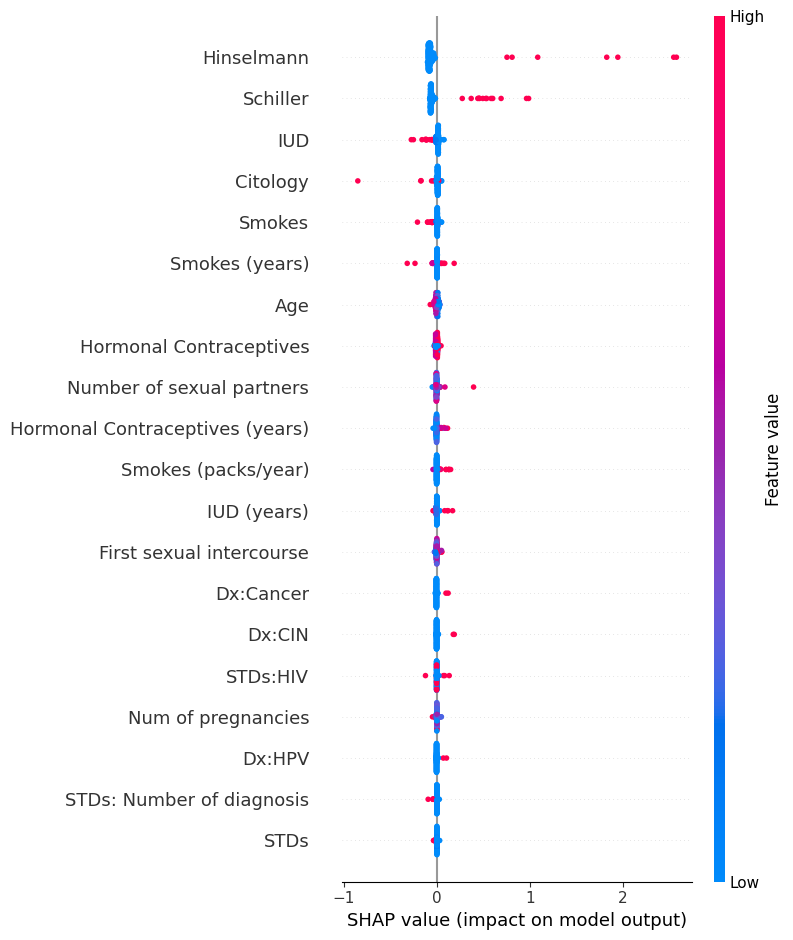

In [52]:
explainer = shp.KernelExplainer(svm.predict, x_train)
shap_values = explainer.shap_values(x_test)
shp.summary_plot(shap_values, x_test, feature_names=features_rf.columns)

# Conclusion

Can a biopsy be predicted through machine learning and did that happen. Short answer, it didn't happen now but despite the result, it looks like we're able to predict if a biops is needed with machine learning.

The thing is that in the beginning when a classifier is used it showed that the models didn't score bad. But the problem there was that the models were only able to make guesses because they had to round their number up or down. Later on a regression model is used. Specifically nearest neighbors and support vector regression. These 2 models scored bad but by checking the feature importance it was clear that they did use the right features. After checking the feature importance, scores and checking in with the teachers it was clear that I needed more features that help determine if a biopsy is needed despite the fact that the dataset came with a lot of features all with their own reason why it is in there and how it affects the target.

In it's current state it won't be used in the medical field. But it did show the promise of being useful if developed further with more features that can point out if someone has a higher chance of cervical cancer and/or is advised a biopsy. And for future data development, perhaps also chance the type of biopsy from boolean to integer or even a float.